# 逻辑回归

在本练习中，您将实现逻辑回归并将其应用于两个不同的数据集。

# 大纲

- [1 包]()
- [2 逻辑回归]()
   - [2.1 问题陈述]()
   - [2.2 加载和可视化数据]()
   - [2.3 S型函数]()
   - [2.4 逻辑回归的成本函数]()
   - [2.5 逻辑回归的梯度]()
   - [2.6 使用梯度下降学习参数 ]()
   - [2.7 绘制决策边界]()
   - [2.8 评估逻辑回归]()
- [3 正则化逻辑回归]()
   - [3.1 问题陈述]()
   - [3.2 加载和可视化数据]()
   - [3.3 特征映射]()
   - [3.4 正则化逻辑回归的成本函数]()
   - [3.5 正则化逻辑回归的梯度]()
   - [3.6 使用梯度下降学习参数]()
   - [3.7 绘制决策边界]()
   - [3.8 评估正则化逻辑回归模型]()

## 1 套餐

首先，让我们运行下面的单元来导入您在此作业期间需要的所有包。

- [NumPy](https://numpy.org)是使用Python进行科学计算的基础包。
- [matplotlib](https://matplotlib.org)是一个著名的Python绘图库。
- ``utils.py``包含此任务的辅助函数。您不需要修改此文件中的代码。

In [74]:
from utils import *

%matplotlib inline

## 2 逻辑回归

在练习的这一部分中，您将构建逻辑回归模型来预测学生是否被大学录取。

### 2.1 问题陈述

假设您是大学系的管理员，您想根据每个申请人的两次考试成绩来确定他们的录取机会。

* 您拥有以前申请人的历史数据，可以将其用作逻辑回归的训练集。
* 对于每个培训示例，您都有申请人两次考试的成绩和录取决定。
* 您的任务是建立一个分类模型，根据这两次考试的分数来估计申请人的录取概率。

### 2.2 加载和可视化数据

您将首先加载此任务的数据集。

- 下面显示的`load_dataset()`函数将数据加载到变量`X_train`和`y_train`中
   - `X_train`包含学生两次考试的考试成绩
   - `y_train`是录取决定
       - 如果学生被录取，则`y_train = 1`
       - 如果学生没有被录取，则`y_train = 0`
   - `X_train`和`y_train`都是NumPy数组。

In [42]:
X_train, y_train = load_data("data/ex2data1.txt")

#### 查看变量

让我们更熟悉您的数据集。

- 一个好的起点是打印出每个变量并查看它包含的内容。

下面的代码打印`X_train`的前五个值和变量的类型。

In [43]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:", type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


现在打印`y_train`的前五个值

In [44]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:", type(y_train))

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### 检查变量的维度

熟悉数据的另一个有用方法是查看其维度。让我们打印`X_train`和`y_train`的形状，看看数据集中有多少训练样本。

In [45]:
print('The shape of X_train is: ' + str(X_train.shape))
print('The shape of y_train is: ' + str(y_train.shape))
print('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


#### 可视化您的数据

在开始实现任何学习算法之前，如果可能的话，将数据可视化总是好的。
- 下面的代码在二维图上显示数据（如下所示），其中轴是两次考试成绩，正例和负例用不同的标记显示。
- 我们使用 utils.py 文件中的辅助函数来生成此图。

<img src="../../images/figure 1.png" width="450" height="450">

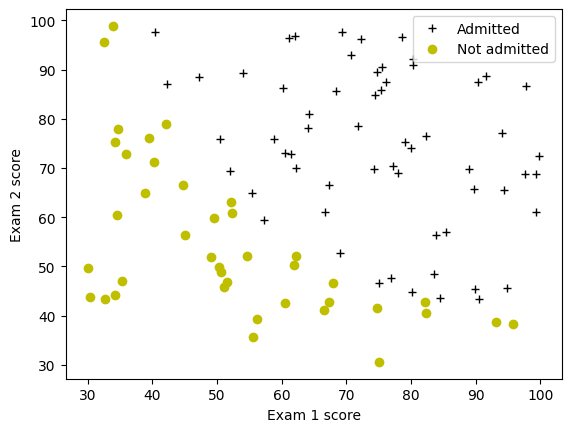

In [46]:
plot_data(X_train, y_train[:], pos_label="Admitted", neg_label="Not admitted")
plt.ylabel('Exam 2 score')
plt.xlabel('Exam 1 score')
plt.legend(loc="upper right")
plt.show()

您的目标是构建一个逻辑回归模型来拟合这些数据。

- 通过此模型，您可以根据新生的两次考试成绩来预测新生是否会被录取。

### 2.3 S形函数

回想一下，对于逻辑回归，模型表示为

$$f_{\mathbf{w},b}(x)=g(\mathbf{w}\cdot\mathbf{x}+b)$$

其中函数$g$是sigmoid函数。sigmoid函数定义为：

$$g(z)=\frac{1}{1+e^{-z}}$$

让我们首先实现sigmoid函数，以便本作业的其余部分可以使用它。

### 练习1
请完成`sigmoid`函数进行计算

$$g(z)=\frac{1}{1+e^{-z}}$$

注意

- `z`并不总是单个数字，也可以是数字数组。
- 如果输入是数字数组，我们希望将sigmoid函数应用于输入数组中的每个值。

如果您遇到困难，可以查看下面单元格后面提供的提示来帮助您实施。

In [47]:
def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    return g

完成后，尝试通过调用下面单元格中的`sigmoid(x)`来测试一些值。

- 对于x较大的正值，sigmoid应接近1，而对于较大的负值，sigmoid应接近0。
- 评估`sigmoid(0)`应该正好为 0.5。

In [48]:
print("sigmoid(0) = " + str(sigmoid(0)))

sigmoid(0) = 0.5


**期望输出**：

<table>
    <tr>
        <td>
            <b>
                sigmoid(0)
            <b>
        </td>
        <td>
            0.5
        </td> 
    </tr>
</table>

- 如前所述，您的代码还应该适用于向量和矩阵。对于矩阵，您的函数应该对每个元素执行sigmoid函数。

In [75]:
print("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))
from public_tests import *

sigmoid_test(sigmoid)

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]
All tests passed!


**期望输出**：

<table>
    <tr>
        <td>
            <b>
                sigmoid([-1, 0, 1, 2])
            <b>
        </td> 
        <td>
            [0.26894142        0.5           0.73105858        0.88079708]
        </td> 
    </tr>
</table>

### 2.4 逻辑回归的成本函数

在本部分中，您将实现逻辑回归的成本函数。

### 练习2

请使用下面的等式完成`compute_cost`函数。

回想一下，对于逻辑回归，成本函数的形式为

$$J(\mathbf{w},b)=\frac{1}{m}\sum_{i=0}^{m-1}\left[loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}),y^{(i)})\right]\tag{1}$$

在哪里

* m是数据集中训练样本的数量
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}),y^{(i)})$是单个数据点的成本，即——
  $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}),y^{(i)})=-y^{(i)}\log\left(f_{\mathbf{w},b}\left(\mathbf{x}^{(i)}\right)\right)-\left(1-y^{(i)}\right)\log\left(1-f_{\mathbf{w},b}\left(\mathbf{x}^{(i)}\right)\right)\tag{2}$$
* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$是模型的预测，而$y^{(i)}$是实际标签
* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})=g(\mathbf{w}\cdot\mathbf{x^{(i)}}+b)$其中函数$g$是sigmoid函数。
    * 首先计算一个中间变量$z_{\mathbf{w},b}(\mathbf{x}^{(i)})=\mathbf{w}\cdot\mathbf{x^{(i)}}+b=w_0x^{(i)}_0+...+w_{n-1}x^{(i)}_{n-1}+b$其中$n$是特征，在计算$f_{\mathbf{w},b}(\mathbf{x}^{(i)})=g(z_{\mathbf{w},b}(\mathbf{x}^{(i)}))$

笔记：

* 当您执行此操作时，请记住变量`X_train`和`y_train`不是标量值，而是形状分别为`(m, n)`和`(m, 1)`的矩阵，其中$n$是数字特征数，$m$是训练样本的数量。
* 您可以使用上面为这部分实现的sigmoid函数。

如果您遇到困难，可以查看下面单元格后面提供的提示来帮助您实施。

In [50]:
def compute_cost(X, y, w, b, _=1):
    m, n = X.shape
    total_cost = 0
    for i in range(m):
        f = sigmoid(X[i].dot(w) + b)
        total_cost += -y[i] * np.log(f) - (1 - y[i]) * np.log(1 - f)
    return total_cost / m

In [51]:
m, n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0.
cost = compute_cost(X_train, y_train, initial_w, initial_b)
print('Cost at initial w (zeros): {:.3f}'.format(cost))

Cost at initial w (zeros): 0.693


**期望输出**：
<table>
    <tr>
        <td>
            <b>
                Cost at initial w (zeros)
            </b>
        </td>
        <td>
            0.693
        </td> 
  </tr>
</table>

In [52]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)
print('Cost at test w,b: {:.3f}'.format(cost))
compute_cost_test(compute_cost)

Cost at test w,b: 0.218
All tests passed!


**期望输出**：
<table>
    <tr>
        <td>
            <b>
                Cost at test w,b
            </b>
        </td>
        <td>
            0.218
        </td> 
    </tr>
</table>

### 2.5 逻辑回归的梯度

在本节中，您将实现逻辑回归的梯度。

回想一下，梯度下降算法是：

$$\begin{align*}
&\text{repeat until convergence:}\;\lbrace\\
& \;\;\;w_j=w_j-\alpha\frac{\partial J(\mathbf{w},b)}{\partial w_j}\;&\text{for j := 0..n-1}\tag{1}\\ 
& \;\;\;\;\;b=b-\alpha\frac{\partial J(\mathbf{w},b)}{\partial b}\\
&\rbrace
\end{align*}$$

其中每次迭代对所有$j$的$w_j$执行同时更新。

### 练习 3

请完成`compute_gradient`函数来计算$\frac{\partial J(\mathbf{w},b)}{\partial w}$,$\frac{\partial J(\mathbf{w},b)}{\partial b}$来自下面的方程（2）和（3）。

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}=\frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{\mathbf{w},b}(\mathbf{x}^{(i)})-\mathbf{y}^{(i)})\tag{2}
$$
$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}=\frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{\mathbf{w},b}(\mathbf{x}^{(i)})-\mathbf{y}^{(i)})x_{j}^{(i)}\tag{3}
$$

* m是数据集中训练样本的数量
* $f_{\mathbf{w},b}(x^{(i)})$ 是模型的预测，而 $y^{(i)}$ 是实际标签
- **注意**：虽然这个梯度看起来与线性回归梯度相同，但公式实际上是不同的，因为线性和逻辑回归对$f_{\mathbf{w},b}(x)$的定义不同。

和以前一样，您可以使用上面实现的sigmoid函数，如果遇到困难，您可以查看下面单元格后面出现的提示来帮助您实现。

In [53]:
def compute_gradient(X, y, w, b, _=None):
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.
    for i in range(m):
        f = sigmoid(X[i].dot(w) + b)
        dj_dw += (f - y[i]) * X[i]
        dj_db += (f - y[i])
    return dj_db / m, dj_dw / m

运行下面的单元格来检查`compute_gradient`函数的实现，其中参数$w$有两种不同的初始化

In [54]:
initial_w = np.zeros(n)
initial_b = 0.
dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}')
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}')

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


**期望输出**：
<table>
    <tr>
        <td>
            <b>
                dj_db at initial w (zeros)
            </b>
        </td>
        <td>
            -0.1
         </td> 
    </tr>
    <tr>
        <td>
            <b>
                dj_dw at initial w (zeros):
            </b>
        </td>
        <td>
            [-12.00921658929115, -11.262842205513591]
         </td> 
    </tr>
</table>

In [55]:
test_w = np.array([0.2, -0.5])
test_b = -24
dj_db, dj_dw = compute_gradient(X_train, y_train, test_w, test_b)
print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]
All tests passed!


**期望输出**：
<table>
    <tr>
        <td> 
            <b>
                dj_db at initial w (zeros)
            </b>
        </td>
        <td>
            -0.5999999999991071 
        </td> 
    </tr>
    <tr>
        <td>
            <b>
                ddj_dw at initial w (zeros):
            </b>
        </td>
    <td>
        [-44.8313536178737957, -44.37384124953978] 
    </td> 
    </tr>
</table>

### 2.6 使用梯度下降学习参数

与之前的作业类似，您现在将使用梯度下降找到逻辑回归模型的最佳参数。

- 您不需要为此部分实现任何内容。 只需运行下面的单元格即可。
- 验证梯度下降是否正常工作的一个好方法是查看
  
  $J(\mathbf{w},b)$的值并检查它是否随着每一步而减少。
- 假设您已经实现了梯度并正确计算了成本，您的$J(\mathbf{w},b)$值不应增加，并且应在算法结束时收敛到稳定值。

In [56]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_):
    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)
        w_in = w_in - alpha * dj_dw
        b_in = b_in - alpha * dj_db
        if i < 100000:
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w_in, b_in, J_history, w_history

现在让我们运行上面的梯度下降算法来学习数据集的参数。

**笔记**

下面的代码块需要几分钟才能运行，尤其是对于非矢量化版本。您可以减少`iterations`来测试您的实现并加快迭代速度。如果您有时间，请尝试运行100,000次迭代以获得更好的结果。

In [57]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1, 1) - 0.5)
initial_b = -8
iterations = 100000
alpha = 0.001
w, b, J_history, _ = gradient_descent(X_train, y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha,
                                      iterations, 0)

Iteration    0: Cost     1.01   
Iteration 10000: Cost     0.30   
Iteration 20000: Cost     0.30   
Iteration 30000: Cost     0.30   
Iteration 40000: Cost     0.29   
Iteration 50000: Cost     0.29   
Iteration 60000: Cost     0.29   
Iteration 70000: Cost     0.28   
Iteration 80000: Cost     0.28   
Iteration 90000: Cost     0.28   
Iteration 99999: Cost     0.28   


### 2.7 绘制决策边界

我们现在将使用梯度下降的最终参数来绘制线性拟合。如果您正确实现了前面的部分，您应该看到以下图：

<img src="../../images/figure 2.png" width="450" height="450">

我们将使用`utils.py`文件中的辅助函数来创建此图。

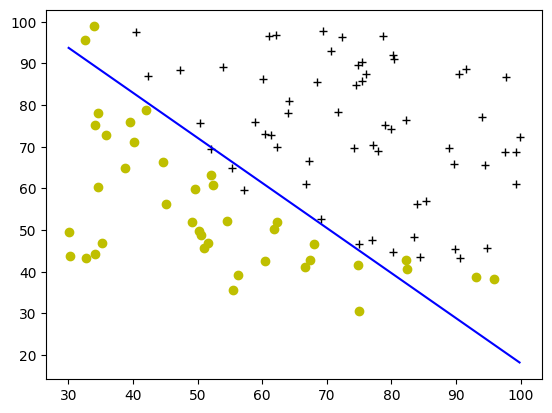

In [58]:
plot_decision_boundary(w, b, X_train, y_train)

### 2.8 评估逻辑回归

我们可以通过查看学习模型对训练集的预测效果来评估我们找到的参数的质量。

您将实现下面的`predict`函数来执行此操作。

### 练习 4

请完成`predict`函数，以在给定数据集和学习参数向量$w$和$b$的情况下生成`1`或`0`预测。

- 首先，您需要根据模型$f(x^{(i)})=g(w\cdot x^{(i)})$计算每个示例的预测
    - 你之前已经在上面的部分中实现过这个
- 我们将模型的输出（$f(x^{(i)})$）解释为给定$x^{(i)}$且参数化为$y^{(i)}=1$的概率$w$。
- 因此，要从逻辑回归模型获得最终预测（$y^{(i)}=0$或$y^{(i)}=1$），您可以使用以下启发式——

   如果$f(x^{(i)})>=0.5$，则预测$y^{(i)}=1$

   如果$f(x^{(i)})<0.5$，则预测$y^{(i)}=0$
    
如果您遇到困难，可以查看下面单元格后面提供的提示来帮助您实施。

In [59]:
def predict(X, w, b):
    m, n = X.shape
    p = np.zeros(m)
    for i in range(m):
        f = sigmoid(X[i].dot(w) + b)
        p[i] = 1 if f >= 0.5 else 0
    return p

完成`predict`函数后，让我们运行下面的代码，通过计算正确示例的百分比来报告分类器的训练准确性。

In [60]:
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3
tmp_X = np.random.randn(4, 2) - 0.5
tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


**期望输出** 

<table>
    <tr>
        <td>
            <b>
                Output of predict: shape (4,),value [0. 1. 1. 1.]
            </b>
        </td>
    </tr>
</table>

现在让我们用它来计算训练集的准确性

In [61]:
p = predict(X_train, w, b)
print('Train Accuracy: %f' % (np.mean(p == y_train) * 100))

Train Accuracy: 91.000000


<table>
    <tr>
        <td>
            <b>
                Train Accuracy (approx):
            </b>
        </td>
        <td>
            92.00
         </td> 
    </tr>
</table>

## 3 正则化逻辑回归

在练习的这一部分中，您将实施正则化逻辑回归来预测制造工厂的微芯片是否通过质量保证（QA）。在质量检查期间，每个微芯片都会经过各种测试，以确保其正常运行。

### 3.1 问题陈述

假设您是工厂的产品经理，您有一些微芯片在两次不同测试中的测试结果。

- 通过这两项测试，您想确定是否应该接受或拒绝微芯片。
- 为了帮助您做出决定，您拥有过去微芯片的测试结果数据集，您可以从中构建逻辑回归模型。

### 3.2 加载和可视化数据

与本练习的前面部分类似，我们首先加载此任务的数据集并对其进行可视化。

- 下面显示的`load_dataset()`函数将数据加载到变量`X_train`和`y_train`中
   - `X_train`包含两次测试中微芯片的测试结果
   - `y_train`包含QA的结果
       - 如果微芯片被接受，则`y_train = 1`
       - 如果微芯片被拒绝，则`y_train = 0`
   - `X_train`和`y_train`都是NumPy数组。

In [62]:
X_train, y_train = load_data("data/ex2data2.txt")

#### 查看变量

下面的代码打印`X_train`和`y_train`的前五个值以及变量的类型。

In [63]:
print("X_train:", X_train[:5])
print("Type of X_train:", type(X_train))
print("y_train:", y_train[:5])
print("Type of y_train:", type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


#### 检查变量的维度

熟悉数据的另一个有用方法是查看其维度。让我们打印`X_train`和`y_train`的形状，看看数据集中有多少训练样本。

In [64]:
print('The shape of X_train is: ' + str(X_train.shape))
print('The shape of y_train is: ' + str(y_train.shape))
print('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


#### 可视化您的数据

辅助函数`plot_data`（来自`utils.py`）用于生成如图3所示的图形，其中轴是两个测试分数，以及正数（y=1，接受）和负数（y=0，被拒绝）示例用不同的标记显示。

<img src="../../images/figure 3.png" width="450" height="450">

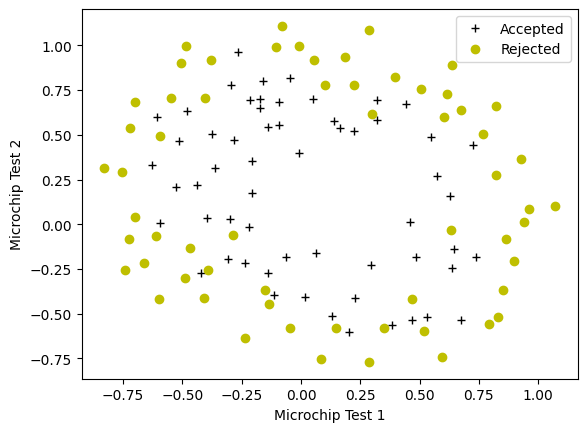

In [65]:
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")
plt.ylabel('Microchip Test 2')
plt.xlabel('Microchip Test 1')
plt.legend(loc="upper right")
plt.show()

图3显示我们的数据集无法通过图中的直线分为正例和负例。因此，逻辑回归的直接应用在此数据集上不会表现良好，因为逻辑回归只能找到线性决策边界。

### 3.3 特征映射

更好地拟合数据的一种方法是从每个数据点创建更多特征。在提供的函数`map_feature`中，我们将把特征映射到$x_1$和$x_2$的所有多项式项中，直至六次方。

$$\mathrm{map\_feature}(x)= 
\left[\begin{array}{c}
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1x_2^5\\
x_2^6\end{array}\right]$$

作为此映射的结果，我们的两个特征向量（两次QA测试的分数）已转换为27维向量。

- 在这个高维特征向量上训练的逻辑回归分类器将具有更复杂的决策边界，并且在我们的二维图中绘制时将是非线性的。
- 我们在utils.py中为您提供了`map_feature`函数。

In [66]:
print("Original shape of data:", X_train.shape)
mapped_X = map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


我们还打印`X_train`和`mapped_X`的第一个元素来查看转换。

In [67]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


虽然特征映射允许我们构建更具表现力的分类器，但它也更容易出现过度拟合。在练习的下一部分中，您将实施正则化逻辑回归来拟合数据，并亲自了解正则化如何帮助解决过度拟合问题。

### 3.4 正则化逻辑回归的成本函数

在这一部分中，您将实现正则化逻辑回归的成本函数。

回想一下，对于正则化逻辑回归，成本函数的形式为

$$J(\mathbf{w},b)=\frac{1}{m}\sum_{i=0}^{m-1}\left[-y^{(i)}\log\left(f_{\mathbf{w},b}\left(\mathbf{x}^{(i)}\right)\right)-\left(1-y^{(i)}\right)\log\left(1-f_{\mathbf{w},b}\left(\mathbf{x}^{(i)}\right)\right)\right]+\frac{\lambda}{2m}\sum_{j=0}^{n-1}w_j^2$$

将此与没有正则化的成本函数（您在上面实现的）进行比较，其形式为

$$J(\mathbf{w}.b)=\frac{1}{m}\sum_{i=0}^{m-1}\left[-y^{(i)}\log\left(f_{\mathbf{w},b}\left(\mathbf{x}^{(i)}\right)\right)-\left(1-y^{(i)}\right)\log\left(1-f_{\mathbf{w},b}\left(\mathbf{x}^{(i)}\right)\right)\right]$$

区别在于正则化项，即$$\frac{\lambda}{2m}\sum_{j=0}^{n-1}w_j^2$$

请注意，$b$参数未正则化。

### 练习 5

请完成下面的`compute_cost_reg`函数来计算$w$中每个元素的以下项

$$\frac{\lambda}{2m}\sum_{j=0}^{n-1}w_j^2$$

然后，起始代码将其添加到没有正则化的成本中（您在上面的`compute_cost`中计算）以计算调整后的成本。

如果您遇到困难，可以查看下面单元格后面提供的提示来帮助您实施。

In [68]:
def compute_cost_reg(X, y, w, b, lambda_=1):
    m, n = X.shape
    cost_without_reg = compute_cost(X, y, w, b)
    reg_cost = np.sum(np.power(w, 2))
    total_cost = cost_without_reg + (lambda_ / (2 * m)) * reg_cost
    return total_cost

运行下面的单元格来检查`compute_cost_reg`函数的实现。

In [69]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)
print("Regularized cost :", cost)
compute_cost_reg_test(compute_cost_reg)

Regularized cost : 0.6618252552483948
All tests passed!


**期望输出**：

<table>
    <tr>
        <td>
            <b>
                Regularized cost : 
            </b>
        </td>
        <td>
            0.6618252552483948 
        </td> 
    </tr>
</table>

### 3.5 正则化逻辑回归的梯度

在本节中，您将实现正则化逻辑回归的梯度。

正则化成本函数的梯度有两个组成部分。第一个$\frac{\partial J(\mathbf{w},b)}{\partial b}$是标量，另一个是与参数$\mathbf{w}$形状相同的向量，其中$j^\mathrm{th}$元素定义如下：

$$\frac{\partial J(\mathbf{w},b)}{\partial b}=\frac{1}{m}\sum_{i=0}^{m-1}(f_{\mathbf{w},b}(\mathbf{x}^{(i)})-y^{(i)})$$

$$\frac{\partial J(\mathbf{w},b)}{\partial w_j} =\left(\frac{1}{m}\sum_{i=0}^{m-1}(f_{\mathbf{w},b}(\mathbf{x}^{(i)})-y^{(i)})x_j^{(i)}\right)+\frac{\lambda}{m}w_j\quad\,\mbox{for $j=0\cdots(n-1)$}$$

将此与没有正则化的成本函数的梯度（您在上面实现的）进行比较，其形式为

$$
\frac{\partial J(\mathbf{w},b)}{\partial b}=\frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{\mathbf{w},b}(\mathbf{x}^{(i)})-\mathbf{y}^{(i)})\tag{2}
$$

$$
\frac{\partial J(\mathbf{w},b)}{\partial w_j}=\frac{1}{m}\sum\limits_{i=0}^{m-1}(f_{\mathbf{w},b}(\mathbf{x}^{(i)})-\mathbf{y}^{(i)})x_{j}^{(i)}\tag{3}
$$

可以看到，$\frac{\partial J(\mathbf{w},b)}{\partial b}$是一样的，区别在于$\frac{\partial J(\mathbf{w},b)}{\partial w}$，即$$\frac{\lambda}{m}w_j\quad\,\mbox{for $j=0\cdots(n-1)$}$$

### 练习 6

请完成下面的`compute_gradient_reg`函数，修改下面的代码来计算以下项

$$\frac{\lambda}{m}w_j\quad\,\mbox{for $j=0\cdots(n-1)$}$$

起始代码会将此项添加到从上面的`compute_gradient`返回的$\frac{\partial J(\mathbf{w},b)}{\partial w}$中，以获得正则化成本函数的梯度。

如果您遇到困难，可以查看下面单元格后面提供的提示来帮助您实施。

In [70]:
def compute_gradient_reg(X, y, w, b, lambda_=1):
    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)
    dj_dw += lambda_ / m * w
    return dj_db, dj_dw

运行下面的单元格来检查`compute_gradient_reg`函数的实现。

In [71]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)
print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280124, 0.0536273463274574, 0.0031402782673134637]
All tests passed!


**期望输出**：

<table>
    <tr>
        <td>
            <b>
                dj_db:
            </b>
            0.07138288792343656
        </td>
    </tr>
    <tr>
        <td>     
            <b>
                First few elements of regularized dj_dw:
            </b>
        </td>
    </tr>
    <tr>
        <td> 
            [[-0.010386028450548701], [0.01140985288328012], [0.0536273463274574], [0.003140278267313462]] 
        </td> 
    </tr>
</table>

### 3.6 使用梯度下降学习参数

与前面的部分类似，您将使用上面实现的梯度下降函数来学习最佳参数$w$,$b$。

- 如果您已正确完成正则化逻辑回归的成本和梯度，您应该能够单步执行下一个单元格以学习参数$w$。
- 训练参数后，我们将用它来绘制决策边界。

**笔记**

下面的代码块需要相当长的时间才能运行，特别是对于非矢量化版本。您可以减少`iterations`来测试您的实现并加快迭代速度。如果您有时间，请运行100,000次迭代以获得更好的结果。

In [72]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 1.
lambda_ = 0.01
iterations = 100000
alpha = 0.01
w, b, J_history, _ = gradient_descent(X_mapped, y_train, initial_w, initial_b, compute_cost_reg, compute_gradient_reg,
                                      alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 10000: Cost     0.45   
Iteration 20000: Cost     0.40   
Iteration 30000: Cost     0.38   
Iteration 40000: Cost     0.37   
Iteration 50000: Cost     0.36   
Iteration 60000: Cost     0.36   
Iteration 70000: Cost     0.35   
Iteration 80000: Cost     0.35   
Iteration 90000: Cost     0.35   
Iteration 99999: Cost     0.35   


### 3.7 绘制决策边界

为了帮助您可视化该分类器学习的模型，我们将使用`plot_decision_boundary`函数来绘制分隔正例和负例的（非线性）决策边界。

- 在函数中，我们通过在均匀间隔的网格上计算分类器的预测来绘制非线性决策边界，然后绘制预测从y=0到y=1变化的等高线图。
- 学习参数$w$、$b$后，下一步是绘制类似于图4的决策边界。

<img src="../../images/figure 4.png" width="450" height="450">

### 3.8 评估正则化逻辑回归模型

您将使用上面实现的`predict`函数来计算训练集上的规范化逻辑回归模型的准确性

In [73]:
p = predict(X_mapped, w, b)
print('Train Accuracy: %f' % (np.mean(p == y_train) * 100))

Train Accuracy: 83.898305


**期望输出**：

<table>
    <tr>
        <td>
            <b>
                Train Accuracy:
            </b>
            ~ 80%
        </td>
    </tr>
</table>